In [1]:
# import required python libraries
import geopandas as gpd # for geo-data structure
import numpy as np # for some operation better done with numpy
import matplotlib.pyplot as plt # for creating plots
import shapely.geometry # for geometry data crunching
from shapely.geometry import Point # specifically for point geometry data manipulation
#import keplergl
#from keplergl import KeplerGl
import pandas as pd
crs = {'init': 'epsg:4326'}
from shapely.geometry import Point
import mpl_toolkits
import seaborn as sns

</center><img src="ML integration workflow.jpg"  width="1600" height="600"/></center>

In [7]:
s2 = pd.read_csv('BASIC SCHOOL DATA + GPS_with_model_preds (2).csv',low_memory=False,encoding='utf-8')
s1 = pd.read_csv('BASIC SCHOOL DATA + GPS_with_model_preds (1).csv',low_memory=False,encoding='utf-8')
s3 = pd.read_csv('merged_locations.csv',low_memory=False,encoding='utf-8')

In [4]:
f1 = ['conf_yolov5']

In [5]:
f2 = ['conf_efficientnet']

In [6]:
yolo = s[f1]

In [7]:
eff = s[f2]

In [10]:
yolo.head()

,conf_yolov5
0,0.000000
1,0.876609
2,0.154784
3,0.000000
4,0.885101


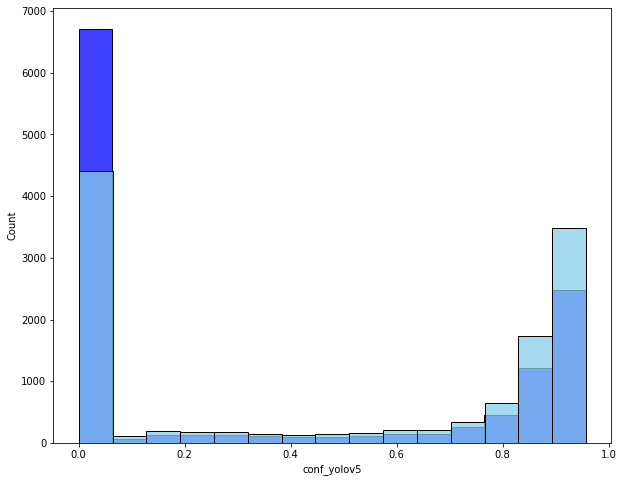

In [28]:
plt.figure(figsize=(10,8))
sns.histplot(data=s1, x="conf_yolov5", color="blue", label="YOLO")
sns.histplot(data=s2, x="conf_yolov5", color="skyblue", label="YOLO")

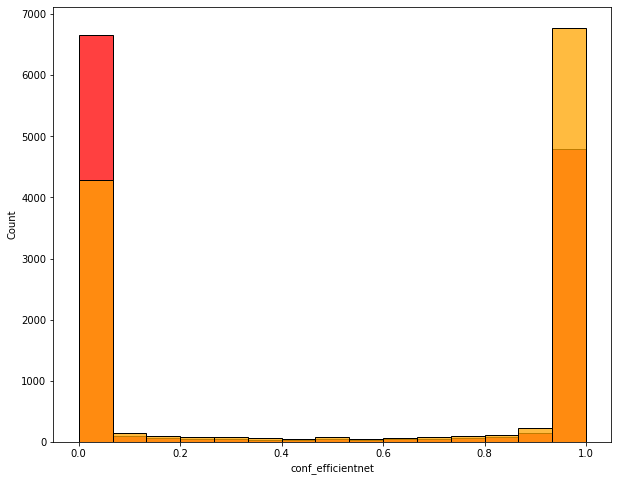

In [29]:
plt.figure(figsize=(10,8))
sns.histplot(data=s1, x="conf_efficientnet", color="red", label="EFFICIENTNET")
sns.histplot(data=s2, x="conf_efficientnet", color="orange", label="EFFICIENTNET")

</center><img src="Sample point.png"  width="1500" height="500"/></center>

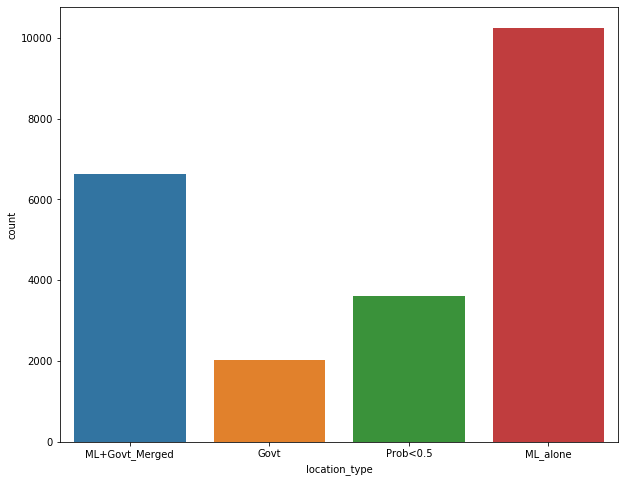

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(x ='location_type', data = s3)

In [11]:
s3['location_type'].value_counts()

ML_alone          10248
ML+Govt_Merged     6632
Prob<0.5           3611
Govt               2037
Name: location_type, dtype: int64

In [10]:
s3.shape

(22528, 186)

In [ ]:
# add giga ids

list_unique_id = []
for i in range(0, len(df1)):
    uid = str(uuid.uuid3(uuid.NAMESPACE_DNS, (str(df1['school_id'][i])+ str(df1['school_name'][i])  + str(df1['latitude'][i]) + str(df1['longitude'][i]))))
    list_unique_id.append(uid)              
df1['giga_id_school'] = list_unique_id


In [ ]:
# add giga_school_id_seq

govt['giga_school_id_seq'] = np.arange(len(govt)) + 1
country_code = 'SD'
list_hex_res = []
for i in range(0, len(govt)):
    h = ("ML_" + govt['country_code'][0] + "_" + govt['giga_school_id_seq'].iloc[i].astype('str').zfill(6)) #Based on school agg count 
    list_hex_res.append(h)
govt['giga_school_id_seq'] = list_hex_res

In [ ]:
#Use giga_school_id_seq as temp school ids for those with no school ids (the ML data points)
df.school_id.where(pd.notnull, df.giga_school_id_seq)

In [ ]:
Use giga_school_id_seq as temp school ids for those with no school ids (the ML data points)
df['school_id'] = df['school_id'].fillna(df['giga_school_id_seq'])